# Prior-list intrusions

In [70]:
from __future__ import division
import numpy as np
import seaborn as sns
import quail
import pandas as pd
import scipy.stats
from scipy.stats import pearsonr
%matplotlib inline

# Load Data

In [71]:
# man = quail.load_egg('../data/man_egg.egg')
# auto = quail.load_egg('../data/auto_egg.egg')

## Function to compute prior list intrusions

In [40]:
# def prior_list_intrusions(egg):
#     """ 
#     Computes prior list intrusions 
    
#     Parameters
#     __________
    
#     egg : quail.Egg
#         egg to analyze
        
#     Returns
#     _________
    
#     res : numpy.ndarray
#         A subject x lists back matrix containing prior lists intrusions.  
#         For example, the first row is the first subject and the first 
#         column is 0 lists back, the second column is 1 list back and
#         so on.
        
#     """

#     prior_intrusions = []

#     # loop over subjects
#     for isub in range(egg.n_subjects):

#         # get subject data
#         subj = egg.crack(subjects=[isub])
        
#         # initialize list
#         prior_int = [[] for i in range(len(subj.pres.index.levels[1]))]

#         # for each recall list
#         for idx, lst in subj.rec.loc[0].iterrows():

#             # for each prior list
#             for iprior in range(idx+1):

#                 # filter out nans and nones
#                 lst = lst[lst.notna()]
                
#                 # get the list iprior back
#                 prior_pres = subj.pres.loc[0].loc[idx-iprior].values.tolist()

#                 # number of intrusions for a given nback, normalized by number of possible recalls
#                 r = lst.apply(lambda x: x in prior_pres).sum() / ((idx+1)*16) # this version normalizes by the number of possible intrusions
#                 # r = lst.apply(lambda x: x in prior_pres).mean() <- this version just computes the proportion of intrusions for a given list

#                 # append to the list
#                 prior_int[iprior].append(r)
         
#         # average within nback
#         s = list(map(lambda x: np.nanmean(x), prior_int))
#         prior_intrusions.append(s)

#     return np.array(prior_intrusions)

## Compute prior list intrusions for automatic

In [72]:
# man_prior_intrusions = prior_list_intrusions(man)
# auto_prior_intrusions = prior_list_intrusions(auto)

In [1]:
df_auto = pd.read_csv('df_auto')
df_man = pd.read_csv('df_man')

In [2]:
df_man

,Unnamed: 0,1back,2back,3back,4back,5back,condition,subject
0,0,0.004464,0.000000,0.000000,0.0,0.000000,manual,0
1,1,0.001116,0.000000,0.000000,0.0,0.000000,manual,1
2,2,0.000000,0.000000,0.000000,0.0,0.000000,manual,2
3,3,0.004464,0.000000,0.000000,0.0,0.000000,manual,3
4,4,0.007440,0.003472,0.003125,0.0,0.000000,manual,4
5,5,0.000000,0.000000,0.000000,0.0,0.000000,manual,5
6,6,0.000000,0.000000,0.000000,0.0,0.000000,manual,6
7,7,0.001488,0.002604,0.000000,0.0,0.000000,manual,7
8,8,0.002232,0.000000,0.000000,0.0,0.000000,manual,8
9,9,0.000000,0.000000,0.000000,0.0,0.000000,manual,9


In [93]:
man_ts = []
auto_ts = []

for idx,df in enumerate([df_man,df_auto]):
    for z in [1, 2, 3, 4, 5]:
        name = str(z)+'back'
        one = np.array(df[name])
        
        if  idx == 0:
            man_ts.append(one)
        else:
            auto_ts.append(one)

## Restructure df for correlations

In [94]:
# man_tmp = pd.melt(df_man, value_vars=['1back', '2back', '3back', '4back', '5back'], id_vars=['subject', 'condition'])
# man_tmp = man_tmp.drop('condition', 1)
# man_tmp = man_tmp.rename({'value':'manual'},inplace=True)

# auto_tmp = pd.melt(df_auto, value_vars=['1back', '2back', '3back', '4back', '5back'], id_vars=['subject', 'condition'])
# auto_tmp = auto_tmp.drop('condition', 1)
# auto_tmp = auto_tmp.rename({'value':'automatic'}, inplace=True)

# df_corr = pd.merge(man_tmp,auto_tmp)

In [95]:
df_corr = pd.read_csv('df_corr')

for z in [1, 2, 3, 4, 5]:
    name = str(z)+'back'
    one = df_corr[df_corr['variable']==name]
    r = pearsonr(one['manual'], one['automatic'])
    print(r)

(0.8847134327042959, 8.751493593520622e-11)
(0.9277596880820868, 1.6534466624881727e-13)
(1.0, 0.0)
(nan, 1.0)
(0.5570860145311557, 0.001385179290387923)


## Plot correlations

/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


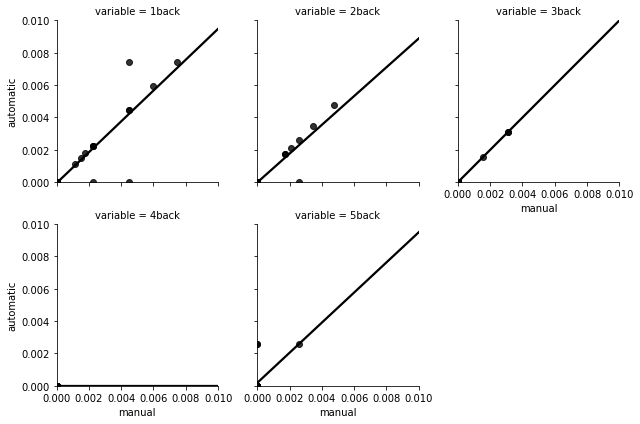

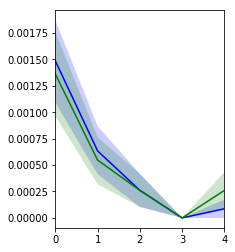

In [96]:
import matplotlib as mpl

g = sns.FacetGrid(df_corr, col='variable', col_wrap=3, ylim=(0,.01), xlim=(0,.01))
g.map(sns.regplot,'manual', 'automatic', color = 'black', ci=None)

plt.savefig('n-back.pdf')

# sns.factorplot(data=df, x='variable', y='value', hue='condition')#3, color = ['blue','green']

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_aspect(2500)
sns.tsplot(np.transpose(man_ts), ax = ax, color = 'blue')
sns.tsplot(np.transpose(auto_ts), ax = ax, color = 'green')

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('tsBack.pdf')